# SWS vs. Evoked

SWS: slow-wave sleep


* Method
    * Probe wired traces are identical to loaded raw traces (.bin) except that the probe has been wired.

* Results:  
    * Large amplitude slow waves (<1 Hz) and delta waves (1-4Hz) visible (as in cats, Destexhe, 1999 ) in Horvath, not in Marques.



### Setup

activate spikinterf

In [18]:
# SETUP PACKAGES
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore')


# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"

os.chdir(PROJ_PATH)
from src.nodes.utils import get_config

# SETUP PARAMETERS
SFREQ_M = 30000          # sampling frequency
SFREQ_H = 20000          # sampling frequency
SFREQ_NE = 20000         # biophy. evoked
SFREQ_NS = 40000         # biophy. evoked


# Horvath ***********************
# vivo horvath
cfg_h, _ = get_config("vivo_horvath", "probe_1").values() 
WIRED_PATH_h1 = cfg_h["probe_wiring"]["output"]
cfg_h, _ = get_config("vivo_horvath", "probe_2").values() 
WIRED_PATH_h2 = cfg_h["probe_wiring"]["output"]

# custom (biophy. model)
# (probe 1)
cfg_hs1, _ = get_config("silico_horvath", "concatenated/probe_1").values()
RAW_PATH_hs1 = cfg_hs1["probe_wiring"]["output"]
# probe 2
cfg_hs2, _ = get_config("silico_horvath", "concatenated/probe_2").values()
RAW_PATH_hs2 = cfg_hs2["probe_wiring"]["output"]
# probe 3
cfg_hs3, _ = get_config("silico_horvath", "concatenated/probe_3").values()
RAW_PATH_hs3 = cfg_hs3["probe_wiring"]["output"]

# neuropixels ***********************
# vivo marques
cfg_m, _ = get_config("vivo_marques", "c26").values() 
RAW_PATH_m = cfg_m["recording"]["input"]
WIRED_PATH_m = cfg_m["probe_wiring"]["output"]

# neuropixels (biophy. spont.)
cfg_ns, param_conf_ns = get_config("silico_neuropixels", "concatenated").values()
RAW_PATH_ns = cfg_ns["probe_wiring"]["40m"]["output_noise_fitd_gain_fitd_adj10perc_less_int16"]

# neuropixels (evoked biophy.)
cfg_ne, _ = get_config("silico_neuropixels", "stimulus").values()
RAW_PATH_ne = cfg_ne["probe_wiring"]["output"]

# FIGURE SETTINGS
FIG_SIZE = (1.5, 1.05)
LG_FRAMEON = False  # no legend frame
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.3
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["xtick.major.width"] = 0.8 * 1.3
plt.rcParams["ytick.major.width"] = 0.8 * 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
    
N_MAJOR_TICKS = 4
N_MINOR_TICKS = 12
savefig_cfg = {"transparent": True, "dpi": 300}  # dpi=300 minimum for publication
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.1, "h_pad": 0}
labels_cfg = {"labelpad":0}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-06-26 15:12:36,619 - root - utils.py - get_config - INFO - Reading experiment config.


2024-06-26 15:12:36,638 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-06-26 15:12:36,648 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-26 15:12:36,658 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-06-26 15:12:36,659 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-26 15:12:36,682 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-06-26 15:12:36,683 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-26 15:12:36,701 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-06-26 15:12:36,702 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-26 15:12:36,720 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-06-26 15:12:36,721 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-26 15:12:36,745 - root - utils.py - get_config 

### Parameters

In [8]:
SITE = 1
LAYER = "L2_3"
dur_sec = 4  # in secs as in Destexhe et al., 1999, JN

### Load data

In [9]:
data = {}

RecM = si.load_extractor(WIRED_PATH_m)
sites_l23_m = np.where(RecM.get_property("layers") == LAYER)[0]
trace_m = RecM.get_traces(channel_ids=[sites_l23_m[SITE]])
data["Marques"] = trace_m

RecH = si.load_extractor(WIRED_PATH_h2)
sites_l23_h = np.where(RecH.get_property("layers") == LAYER)[0]
trace_h = RecH.get_traces(channel_ids=[sites_l23_h[SITE]])
data["Horvath"] = trace_h

### (11s) SWS Marques

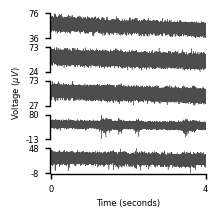

In [16]:
SITE = 0  # first site
layers = ["L1", "L2_3", "L4", "L5", "L6"]

fig, ax = plt.subplots(5, figsize=(2, 2))

for l_i, ly in enumerate(layers):

    RecM = si.load_extractor(WIRED_PATH_m)
    sites = np.where(RecM.get_property("layers") == ly)[0]
    c_id = RecM.channel_ids[np.where(RecM.get_property("layers") == ly)[0]]
    trace_m = RecM.get_traces(channel_ids=[c_id[SITE]])

    # plot
    sgmt = trace_m[: dur_sec * SFREQ_M]
    ax[l_i].plot(sgmt, color=(0.3, 0.3, 0.3))

    # disconnect axes (R style)
    ax[l_i].spines["bottom"].set_position(("axes", -0.05))
    if not l_i == len(layers) - 1:
        ax[l_i].spines["bottom"].set_visible(False)
    ax[l_i].yaxis.set_ticks_position("left")
    ax[l_i].spines["left"].set_position(("axes", -0.01))
    # x
    ax[l_i].set_xlim([0, dur_sec * SFREQ_M])
    ax[l_i].set_xticks([])
    if l_i == len(layers) - 1:
        ax[l_i].set_xticks([0, dur_sec * SFREQ_M], [0, dur_sec])
        ax[l_i].set_xlabel("Time (seconds)")
    # y
    ax[l_i].set_yticks([min(sgmt)[0], max(sgmt)[0]], [min(sgmt)[0], max(sgmt)[0]])
    ax[l_i].set_ylim([min(sgmt)[0], max(sgmt)[0]])
    if l_i == 2:
        ax[l_i].set_ylabel("Voltage ($\mu V$)")
    # remove useless space
    fig.tight_layout(**tight_layout_cfg)

plt.savefig("figures/6_supp/fig2/fig2a_slow_wave_sleep_marques.svg", **savefig_cfg)

### (8s) SWS Horvath

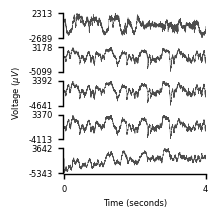

In [17]:
SITE = 0  # first site
layers = ["L1", "L2_3", "L4", "L5", "L6"]

fig, ax = plt.subplots(5, figsize=(2, 2))

for l_i, ly in enumerate(layers):

    # load layer data from probe 1 for layer 1
    # not covered by probe 2
    if ly == "L1":
        RecH = si.load_extractor(WIRED_PATH_h1)
        sites = np.where(RecH.get_property("layers") == ly)[0]
        c_id = RecH.channel_ids[np.where(RecH.get_property("layers") == ly)[0]]
        trace_h = RecH.get_traces(channel_ids=[c_id[SITE]])
    else:
        # load layer data from probe 2 which covers
        # layer 2/3 to 6
        RecH = si.load_extractor(WIRED_PATH_h2)
        c_id = RecH.channel_ids[np.where(RecH.get_property("layers") == ly)[0]]
        trace_h = RecH.get_traces(channel_ids=[c_id[SITE]])

    # plot
    sgmt = trace_h[: dur_sec * SFREQ_H]
    ax[l_i].plot(sgmt, color=(0.3, 0.3, 0.3), rasterized=True)

    # disconnect axes (R style)
    ax[l_i].spines["bottom"].set_position(("axes", -0.05))
    if not l_i == len(layers) - 1:
        ax[l_i].spines["bottom"].set_visible(False)
    ax[l_i].yaxis.set_ticks_position("left")
    ax[l_i].spines["left"].set_position(("axes", -0.01))
    # x
    ax[l_i].set_xlim([0, dur_sec * SFREQ_H])
    ax[l_i].set_xticks([])
    if l_i == len(layers) - 1:
        ax[l_i].set_xticks([0, dur_sec * SFREQ_H], [0, dur_sec])
        ax[l_i].set_xlabel("Time (seconds)")
    # y
    ax[l_i].set_yticks([min(sgmt)[0], max(sgmt)[0]], [min(sgmt)[0], max(sgmt)[0]])
    ax[l_i].set_ylim([min(sgmt)[0], max(sgmt)[0]])
    if l_i == 2:
        ax[l_i].set_ylabel("Voltage ($\mu V$)")
    # remove useless space
    fig.tight_layout(**tight_layout_cfg)

plt.savefig("figures/6_supp/fig2/fig2d_slow_wave_sleep_horvath.svg", **savefig_cfg)

### Custom (Biophy, spont.)

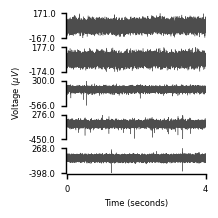

In [21]:
SITE = 0  # first site
layers = ["L1", "L2_3", "L4", "L5", "L6"]

fig, ax = plt.subplots(5, figsize=(2, 2))

for l_i, ly in enumerate(layers):

    # load layer data from probe 1 for layer 1
    # not covered by probe 2
    if ly == "L1" or ly == "L2_3":
        RecH = si.load_extractor(RAW_PATH_hs1)
        sites = np.where(RecH.get_property("layers") == ly)[0]
        c_id = RecH.channel_ids[np.where(RecH.get_property("layers") == ly)[0]]
        trace_h = RecH.get_traces(channel_ids=[c_id[SITE]])
    elif ly == "L4" or ly == "L5":
        # load layer data from probe 2
        # layer 2/3 to 6
        RecH = si.load_extractor(RAW_PATH_hs2)
        c_id = RecH.channel_ids[np.where(RecH.get_property("layers") == ly)[0]]
        trace_h = RecH.get_traces(channel_ids=[c_id[SITE]])
    elif ly == "L6":
        # load layer data from probe 3
        RecH = si.load_extractor(RAW_PATH_hs3)
        c_id = RecH.channel_ids[np.where(RecH.get_property("layers") == ly)[0]]
        trace_h = RecH.get_traces(channel_ids=[c_id[SITE]])

    # plot
    sgmt = trace_h[: dur_sec * SFREQ_H]
    ax[l_i].plot(sgmt, color=(0.3, 0.3, 0.3), rasterized=True)

    # disconnect axes (R style)
    ax[l_i].spines["bottom"].set_position(("axes", -0.05))
    if not l_i == len(layers) - 1:
        ax[l_i].spines["bottom"].set_visible(False)
    ax[l_i].yaxis.set_ticks_position("left")
    ax[l_i].spines["left"].set_position(("axes", -0.01))
    # x
    ax[l_i].set_xlim([0, dur_sec * SFREQ_H])
    ax[l_i].set_xticks([])
    if l_i == len(layers) - 1:
        ax[l_i].set_xticks([0, dur_sec * SFREQ_H], [0, dur_sec])
        ax[l_i].set_xlabel("Time (seconds)")
    # y
    ax[l_i].set_yticks(
        [np.floor(min(sgmt)[0]), np.ceil(max(sgmt)[0])],
        [np.floor(min(sgmt)[0]), np.ceil(max(sgmt)[0])],
    )
    ax[l_i].set_ylim([np.floor(min(sgmt)[0]), np.ceil(max(sgmt)[0])])
    if l_i == 2:
        ax[l_i].set_ylabel("Voltage ($\mu V$)")
    # remove useless space
    fig.tight_layout(**tight_layout_cfg)

plt.savefig("figures/6_supp/fig2/fig2e_trace_custom_biophy.svg", **savefig_cfg)

### Spontaneous (Biophy. model of npx)

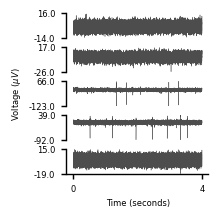

In [7]:
# parameters
site_ix = 0
ly = ["L1", "L2_3", "L4", "L5", "L6"]
DUR_SEC = 4
NSAMP = DUR_SEC * SFREQ_NS  # 16 second

# plot biophy. evoked (raw, one seconds)
fig, ax = plt.subplots(len(ly), 1, figsize=(2, 2))

# get recording extractor
# load just what we need for speed
RawNS = si.load_extractor(RAW_PATH_ns).frame_slice(start_frame=0, end_frame=NSAMP)
layers = RawNS.get_property("layers")
layers = np.array(["L2_3" if x == "L2" or x == "L3" else x for x in layers])

# plot each layer's trace
for li, ly_i in enumerate(ly):

    # get traces
    traces_ns = RawNS.get_traces()[:, layers == ly_i]
    sgmt = traces_ns[:NSAMP, site_ix]
    ax[li].plot(sgmt, color=[0.3, 0.3, 0.3])

    # disconnect axes (R style)
    ax[li].spines["bottom"].set_position(("axes", -0.01))
    if not li == len(ly_i) - 1:
        ax[li].spines[["bottom", "right"]].set_visible(False)
    ax[li].yaxis.set_ticks_position("left")
    ax[li].spines["left"].set_position(("axes", -0.01))

    # x-axis
    ax[li].set_xticks([])
    if li == len(ly) - 1:
        ax[li].spines[["bottom"]].set_visible(True)
        ax[li].set_xticks([0, NSAMP], [0, DUR_SEC])
        ax[li].set_xlabel("Time (seconds)")

    # y-axis
    ax[li].set_yticks(
        [np.floor(min(sgmt)), np.ceil(max(sgmt))],
        [np.floor(min(sgmt)), np.ceil(max(sgmt))],
    )
    ax[li].set_ylim([np.floor(min(sgmt)), np.ceil(max(sgmt))])
    if li == 2:
        ax[li].set_ylabel("Voltage ($\mu V$)")

    # remove useless space
    fig.tight_layout(**tight_layout_cfg)

# save
plt.savefig("figures/6_supp/fig2/fig2g_biophy_spont_npx.svg")

### (3s)Evoked (Biophy. model of npx)

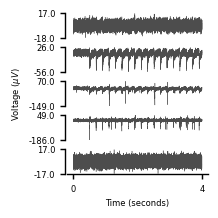

In [6]:
# parameters
site_ix = 0
ly = ["L1", "L2_3", "L4", "L5", "L6"]
DUR_SEC = 4
NSAMP = DUR_SEC * SFREQ_NE  # 16 second

# plot biophy. evoked (raw, one seconds)
fig, ax = plt.subplots(len(ly), 1, figsize=(2, 2))

# get recording extractor
# load just what we need for speed
RawNE = si.load_extractor(RAW_PATH_ne).frame_slice(start_frame=0, end_frame=NSAMP)
layers = RawNE.get_property("layers")
layers = np.array(["L2_3" if x == "L2" or x == "L3" else x for x in layers])

# plot each layer's trace
for li, ly_i in enumerate(ly):

    # get traces
    traces_ne = RawNE.get_traces()[:, layers == ly_i]
    sgmt = traces_ne[:NSAMP, site_ix]
    ax[li].plot(sgmt, color=[0.3, 0.3, 0.3])

    # disconnect axes (R style)
    ax[li].spines["bottom"].set_position(("axes", -0.01))
    if not li == len(ly_i) - 1:
        ax[li].spines[["bottom", "right"]].set_visible(False)
    ax[li].yaxis.set_ticks_position("left")
    ax[li].spines["left"].set_position(("axes", -0.01))

    # x-axis
    ax[li].set_xticks([])
    if li == len(ly) - 1:
        ax[li].spines[["bottom"]].set_visible(True)
        ax[li].set_xticks([0, NSAMP], [0, DUR_SEC])
        ax[li].set_xlabel("Time (seconds)")

    # y-axis
    ax[li].set_yticks(
        [np.floor(min(sgmt)), np.ceil(max(sgmt))],
        [np.floor(min(sgmt)), np.ceil(max(sgmt))],
    )
    ax[li].set_ylim([np.floor(min(sgmt)), np.ceil(max(sgmt))])
    if li == 2:
        ax[li].set_ylabel("Voltage ($\mu V$)")

    # remove useless space
    fig.tight_layout(**tight_layout_cfg)

# save
plt.savefig("figures/6_supp/fig2/fig2f_evoked_npx.svg")